## Backscatter Coefficients
Comparing Monte Carlo to Heinrich's tabulation

In [1]:
using NeXLCore
using DataFrames
using CSV
using Gadfly
using ThreadsX

In [2]:

function backscatter(elm::Element, e0, traj=10000)
  traj2::Function=(t::Electron, mat::Material)->NeXLCore.transport(t, mat, Browning1991)
  sample = bulk(pure(elm))
  count = ThreadsX.sum(Base.OneTo(traj)) do _
    bs = false
    trajectory(gun(Electron, e0, 1.0e-6), sample, traj2) do part, reg
      bs = reg==sample # The final region is the chamber...
    end
    bs ? 1 : 0
  end
  return count/traj
end

backscatter (generic function with 2 methods)

In [3]:
using BenchmarkTools
@btime backscatter(n"C",20.0e3)
@btime backscatter(n"Al",20.0e3)
@btime backscatter(n"Fe",20.0e3)
@btime backscatter(n"U",20.0e3)

  3.503 s (83800570 allocations: 2.68 GiB)


  4.927 s (117601558 allocations: 3.75 GiB)


  5.439 s (134836470 allocations: 4.31 GiB)


  5.246 s (126032698 allocations: 4.02 GiB)


0.5415

In [11]:
hr=CSV.read(joinpath(@__DIR__,"..","data","HeinrichBackscatterCoefficients.csv"), DataFrame)

Row,Z,10 keV,20 keV,30 keV,40 keV,49 keV
,Int64,Float64?,Float64?,Float64,Float64?,Float64?
1,6,0.069,0.06,0.052,0.054,0.052
2,12,0.145,0.14,0.136,0.132,0.13
3,13,missing,missing,0.149,missing,missing
4,14,0.174,0.164,0.159,0.153,0.15
5,22,0.262,0.253,0.243,0.245,0.243
6,24,0.273,0.268,0.265,0.259,0.256
7,25,0.292,0.286,0.284,0.277,0.276
8,26,0.289,0.287,0.275,0.276,0.282
9,27,0.309,0.302,0.302,0.297,0.292


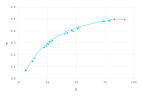

In [12]:
hr[:,"MC[10 keV]"]=[ backscatter(elements[z], 10.0e3) for z in hr[:,"Z"] ]
plot(
  layer(hr, x="Z", y="10 keV", Geom.point),
  layer(hr, x="Z", y="MC[10 keV]", Geom.line)
)

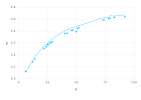

In [13]:
hr[:,"MC[20 keV]"]=[ backscatter(elements[z], 20.0e3) for z in hr[:,"Z"] ]
plot(
  layer(hr, x="Z", y="20 keV", Geom.point),
  layer(hr, x="Z", y="MC[20 keV]", Geom.line)
)

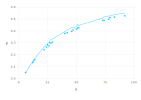

In [14]:
hr[:,"MC[30 keV]"]=[ backscatter(elements[z], 30.0e3) for z in hr[:,"Z"] ]
plot(
  layer(hr, x="Z", y="30 keV", Geom.point),
  layer(hr, x="Z", y="MC[30 keV]", Geom.line)
)

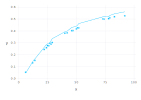

In [15]:
hr[:,"MC[40 keV]"]=[ backscatter(elements[z],40.0e3) for z in hr[:,"Z"] ]
plot(
  layer(hr, x="Z", y="40 keV", Geom.point),
  layer(hr, x="Z", y="MC[40 keV]", Geom.line)
)

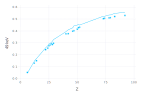

In [16]:
hr[:,"MC[49 keV]"]=[ backscatter(elements[z],49.0e3) for z in hr[:,"Z"] ]
plot(
  layer(hr, x="Z", y="49 keV", Geom.point),
  layer(hr, x="Z", y="MC[49 keV]", Geom.line)
)

In [17]:
hr

Row,Z,10 keV,20 keV,30 keV,40 keV,49 keV,MC[10 keV],MC[20 keV],MC[30 keV],MC[40 keV],MC[49 keV]
,Int64,Float64?,Float64?,Float64,Float64?,Float64?,Float64,Float64,Float64,Float64,Float64
1,6,0.069,0.06,0.052,0.054,0.052,0.0597,0.0544,0.053,0.0464,0.047
2,12,0.145,0.14,0.136,0.132,0.13,0.1642,0.1531,0.1422,0.1409,0.1434
3,13,missing,missing,0.149,missing,missing,0.1727,0.1618,0.1622,0.1557,0.159
4,14,0.174,0.164,0.159,0.153,0.15,0.1891,0.1871,0.1729,0.1657,0.1677
5,22,0.262,0.253,0.243,0.245,0.243,0.2765,0.272,0.2666,0.2619,0.2575
6,24,0.273,0.268,0.265,0.259,0.256,0.2916,0.2895,0.2873,0.2877,0.2763
7,25,0.292,0.286,0.284,0.277,0.276,0.3088,0.2959,0.2963,0.2913,0.2917
8,26,0.289,0.287,0.275,0.276,0.282,0.3159,0.3076,0.3005,0.2977,0.2966
9,27,0.309,0.302,0.302,0.297,0.292,0.3198,0.3183,0.318,0.3,0.3022
